<a href="https://colab.research.google.com/github/2019mohamed/Sample-homomorphism-density/blob/main/Sample_homomorphism_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyxorfilter

     |████████████████████████████████| 122kB 10.5MB/s 


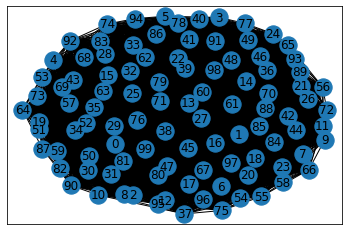

16609
hom_density =  34761892358.114815
161700.0


In [45]:
from pyxorfilter import Xor8, Xor16
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt

prob = math.log2(100)/2
g = nx.generators.fast_gnp_random_graph(100, prob)
nx.draw_networkx(g)
plt.show()

p = nx.cycle_graph(3)
def sGHD (g , p , eps = 0.01 , delta = 0.1 , const = 5):
  m = g.number_of_edges()

  filter = Xor8(m)
  edges = g.edges
  filter.populate(edges)

  epslon = eps
  delta = delta
  const = const
  N= math.floor(const *  math.pow(epslon,-2) * math.log2(math.pow(delta, -1)))
  print(N)

  hom_density = 0
  for _ in range(N):
    f = np.random.randint(0,g.number_of_nodes(), size = p.number_of_nodes())
    multiply = 1
    for e in  p.edges():
      if filter[e]:
        multiply *= f[e[0]] * f[e[1]]
    hom_density += multiply
  hom_density /= N
  return hom_density

print('hom_density = ',sGHD (g , p , const= 0.5))

number_of_triangles = sum(nx.triangles(g).values()) / 3
print(number_of_triangles)
